In [1]:
import numpy as np

In [2]:
X = np.random.rand(5, 3) # Create random data matrix
U, S, VT = np.linalg.svd(X,full_matrices=True) #Full SVD
Uhat, Shat, VThat = np.linalg.svd(X,full_matrices=False)

In [4]:
# download the image if you are running in Colab
!wget --no-check-certificate 'https://github.com/Ewerton-Vieira/Intro-Applied-Math/blob/main/data/dog.jpg?raw=true' -O dog.jpg

zsh:1: command not found: wget


(785, 640, 3)

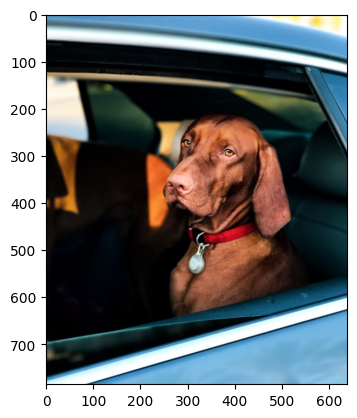

In [9]:
# First, we load the image
import matplotlib.pyplot as plt
from matplotlib.image import imread
A = imread("dog.jpg")
plt.imshow(A)
A.shape

(785, 640)

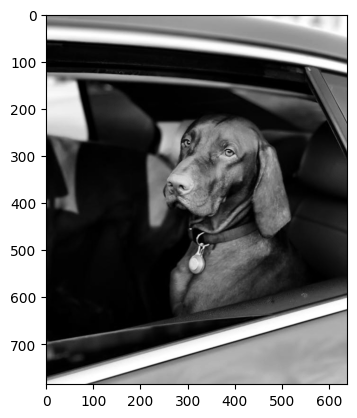

In [10]:
X = np.mean(A, -1); # Convert RGB to grayscale
plt.imshow(X, cmap='gray')
X.shape

In [11]:
# Take the SVD
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
# Approximate matrix with truncated SVD for various ranks r

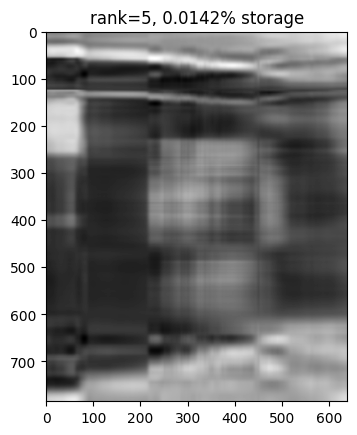

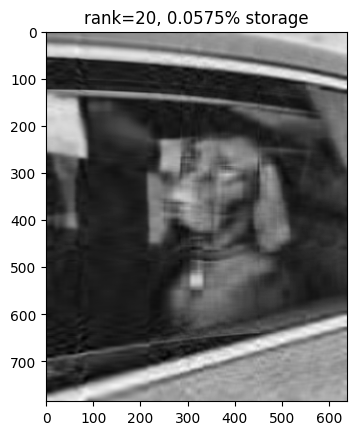

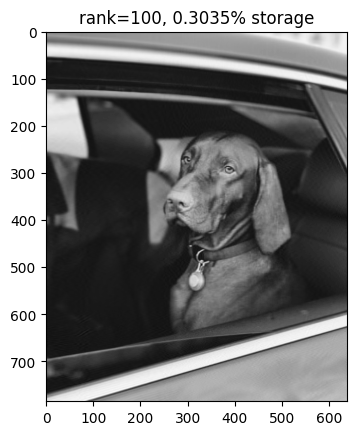

In [12]:
for r in (5, 20, 100): # Construct approximate image
  Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
  img = plt.imshow(Xapprox, cmap='gray')
  storage = 100*(U[:,:r].size + VT[:r,:].size + S[0:r,:r].size )/X.size
  plt.title(f'rank={r}, {storage:.4f}% storage')  # Add caption as a title
  plt.show()

Text(0.5, 1.0, 'Cumulative Sum of Singular Values')

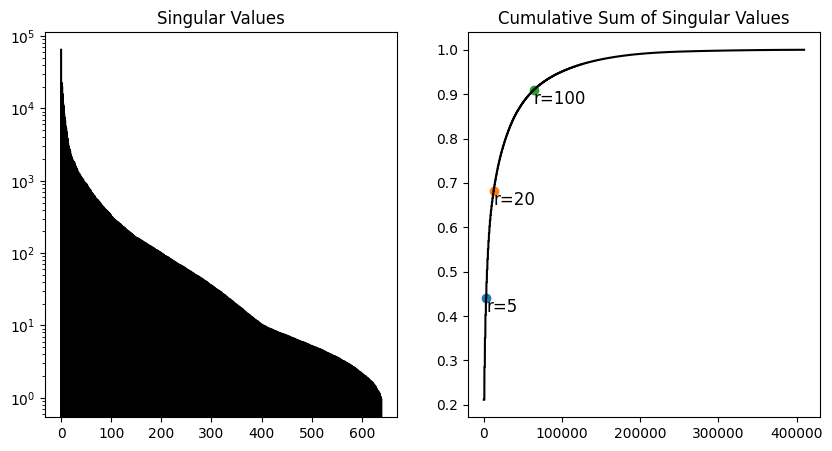

In [13]:
# Plot singular values and cumulative sum
plt.figure(figsize=(10, 5))

# Singular values (log scale)
plt.subplot(1, 2, 1)
plt.semilogy(S, 'k')
plt.title('Singular Values')

# Cumulative sum of singular values
plt.subplot(1, 2, 2)

# Cumulative sum of singular values for r
for r in (5, 20, 100):
  cumulative_sum_r = np.cumsum(S[:r]) / np.sum(S)
  plt.scatter(cumulative_sum_r.size,cumulative_sum_r[-1])
  plt.text(cumulative_sum_r.size,cumulative_sum_r[-1], f'r={r}', fontsize=12, ha='left', va='top')

# Cumulative sum of singular values
plt.plot(np.cumsum(S) / np.sum(S), 'k')

plt.title('Cumulative Sum of Singular Values')